
### Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.
**Answer:**  
Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to form a strong predictive model.  
Each new model focuses on the errors made by the previous models and gives higher weights to misclassified examples.  
By iteratively improving on the mistakes of earlier models, Boosting reduces both bias and variance, leading to better generalization performance.  



### Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
**Answer:**  
- **AdaBoost:** Adjusts the weights of misclassified samples after each iteration. Each weak learner is trained to correct the errors of its predecessor.  
- **Gradient Boosting:** Fits new models to the residual errors (gradients) of the previous model by optimizing a differentiable loss function.  
Thus, AdaBoost focuses on reweighting data points, while Gradient Boosting focuses on gradient optimization.  



### Question 3: How does regularization help in XGBoost?
**Answer:**  
Regularization in XGBoost (using L1 and L2 penalties) helps prevent overfitting by penalizing complex models.  
- **L1 (Lasso)** encourages sparsity in weights (feature selection).  
- **L2 (Ridge)** discourages large weight values.  
This keeps the model simpler, more generalizable, and improves predictive performance.  



### Question 4: Why is CatBoost considered efficient for handling categorical data?
**Answer:**  
CatBoost efficiently handles categorical features using **ordered target statistics**, which prevents target leakage.  
It also automates encoding without manual preprocessing (like one-hot encoding).  
Additionally, it uses **ordered boosting** to reduce overfitting and improve accuracy.  



### Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?
**Answer:**  
Boosting techniques are preferred in:  
- **Credit scoring & loan default prediction** (high accuracy, handles imbalanced data)  
- **Fraud detection** (detect rare events)  
- **Customer churn prediction**  
- **Medical diagnosis**  
- **Online recommendation systems**  
Because Boosting focuses on difficult samples, it often outperforms bagging methods in predictive accuracy.  



### Question 6:  
Train an AdaBoost Classifier on the Breast Cancer dataset and print model accuracy.


In [1]:

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9707602339181286



### Question 7:  
Train a Gradient Boosting Regressor on the California Housing dataset and evaluate R-squared.


In [2]:

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate
y_pred = gbr.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.7803012822391022



### Question 8:  
Train an XGBoost Classifier on the Breast Cancer dataset, tune learning rate using GridSearchCV, and print best parameters and accuracy.


In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model and parameters
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
params = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# GridSearch
grid = GridSearchCV(xgb, params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

Best Parameters: {'learning_rate': 0.05}
Accuracy: 0.9649122807017544



### Question 9:  
Train a CatBoost Classifier and plot the confusion matrix using seaborn.


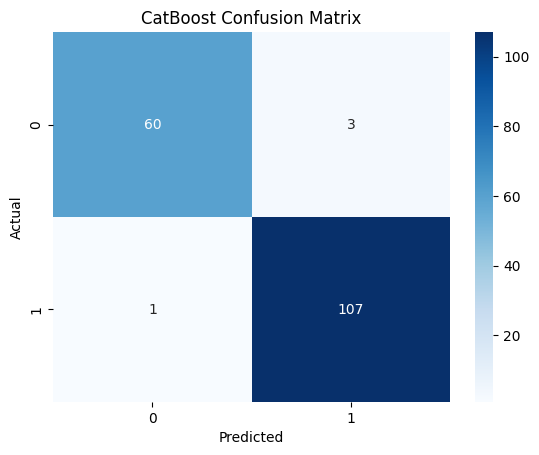

In [9]:

from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Predictions
y_pred = cat_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



### Question 10:  
You're working for a FinTech company predicting loan default using demographics and transaction behavior.

**Answer:**  
**Step-by-step pipeline:**  
1. **Data Preprocessing:** Handle missing values using median/mode imputation; encode categorical data (CatBoost handles it automatically).  
2. **Model Choice:** CatBoost preferred due to categorical features and imbalanced data.  
3. **Hyperparameter Tuning:** Use GridSearchCV or RandomizedSearchCV for learning rate, depth, and iterations.  
4. **Evaluation Metrics:** F1-score, AUC-ROC, and precision-recall are best for imbalanced data.  
5. **Business Impact:** Boosting improves default prediction accuracy, reduces credit risk, and supports better lending decisions.  
